In [1]:
import pandas as pd
import numpy as np

1

In [2]:
df = pd.read_csv("data/titanic.csv")
df=df.dropna()
df = df.drop('PassengerId', axis=1).drop('Name', axis=1).drop('Ticket', axis=1).drop('SibSp', axis=1).drop('Parch', axis=1).drop('Cabin', axis=1)

In [5]:
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
def encode_and_bind(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [6]:
cat_list = ['Sex', 'Embarked']
for col in cat_list:
    df = encode_and_bind(df, col)

In [7]:
    y_col = 'Survived'
    y = df[y_col]
    X = df[df.columns.drop(y_col)]

2

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

3

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [14]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.69


4

In [26]:
from sklearn.preprocessing import StandardScaler  
sc=StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
scaled_clf = MLPClassifier(random_state=1, max_iter=1000000).fit(X_train_scaled, y_train)
y_pred_scaled = scaled_clf.predict(X_test_scaled)

In [31]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_scaled)))

Accuracy: 0.78


    9 percent higher accuracy is achieved after scaling the data

5

In [43]:
from sklearn.model_selection import GridSearchCV
solver = ['sgd', 'adam']
learning_rate_init = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
hidden_layer_sizes = [(100,200,400),(300, 200, 600), (1000,1000,1000), (300, 600, 900)]
activation = ['logistic', 'tanh', 'relu']
parameters = {'solver':solver, 'learning_rate_init':learning_rate_init, 'hidden_layer_sizes':hidden_layer_sizes, 'activation':activation}
clf_GS = GridSearchCV(scaled_clf, parameters, cv=5,n_jobs=-1)
clf_GS.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000000, random_state=1),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100, 200, 400),
                                                (300, 200, 600),
                                                (1000, 1000, 1000),
                                                (300, 600, 900)],
                         'learning_rate_init': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05],
                         'solver': ['sgd', 'adam']})

In [44]:
print("best parameters:",clf_GS.best_params_)

best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (300, 200, 600), 'learning_rate_init': 0.001, 'solver': 'adam'}


In [45]:
best_mlp = clf_GS.best_estimator_
predicted_test = best_mlp.predict(X_test) 
print("accuracy of GS_optimized model:",accuracy_score(y_test, predicted_test))

accuracy of GS_optimized model: 0.9090909090909091


The accuracy of the model was 78 percent before optimization, and now is 91 percent. 13 percent improvement!

6

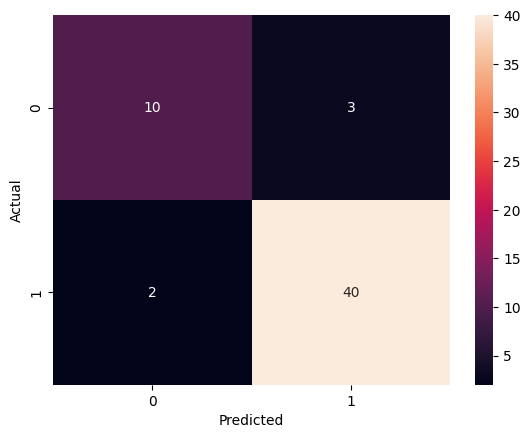

In [46]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test,predicted_test, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [48]:
from sklearn.metrics import precision_recall_fscore_support as prfs

    for the class 0:

In [71]:
precision, recall, F_measure, support = prfs(y_test, predicted_test, average='binary', pos_label=0)
print('precision: ', precision, '\nrecall: ',recall, '\nF_measure: ',F_measure,'\nsupport: ', support )

precision:  0.8333333333333334 
recall:  0.7692307692307693 
F_measure:  0.8 
support:  None


    for the class 1:

In [72]:
precision, recall, F_measure, support = prfs(y_test, predicted_test, average='binary', pos_label=1)
print('precision: ', precision, '\nrecall: ',recall, '\nF_measure: ',F_measure,'\nsupport: ', support )

precision:  0.9302325581395349 
recall:  0.9523809523809523 
F_measure:  0.9411764705882352 
support:  None
